# Uczenie maszynowe

## Wieloklasyfikacja - regresja logistyczna i liniowa

09.11.2016 r.

## Zgadnienie klasyfikacji wieloklasowej

$$\textrm{Zbiór klas: } \qquad C = \{ c_1, c_2, \cdots, c_k \} \qquad |C| = k$$

$$
X = \left[
\begin{array}{ccc}
1 & x_1^{(1)} & \cdots & x_n^{(1)}\\
1 & x_1^{(2)} & \cdots & x_n^{(2)}\\
1 & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & \cdots & x_n^{(m)}\\
\end{array}
\right]\qquad
\vec{y} = \left[\begin{array}{c}
c_i^{(1)}\\
c_i^{(2)}\\
\vdots \\
c_i^{(m)}\\
\end{array}
\right]$$

$$
\dim{X} = m \times (n+1) \qquad \dim{\vec{y}} = m \times 1
$$

# Iris data set

Chcemy przewidzieć gatunek irysa (_Iris-setosa_, _Iris-virginica_ lub _Iris-versicolor_) na podstawie cech określających długość i szerokość łodygi, oraz długość i szerokość płatka.

In [69]:
import pandas
features = ["łod.dł.", "łod.sz.", "pł.dł.", "pł.sz."]
data = pandas.read_csv("iris.csv")
data[:6]

,łod.dł.,łod.sz.,pł.dł.,pł.sz.,Gatunek
0,5.2,3.4,1.4,0.2,Iris-setosa
1,5.1,3.7,1.5,0.4,Iris-setosa
2,6.7,3.1,5.6,2.4,Iris-virginica
3,6.5,3.2,5.1,2.0,Iris-virginica
4,4.9,2.5,4.5,1.7,Iris-virginica
5,6.0,2.7,5.1,1.6,Iris-versicolor


## Przygotowanie danych

In [70]:
import numpy as np

m = len(data)
X = np.matrix(data[features])
X0 = np.ones(m).reshape(m,1)
X = np.hstack((X0, X))
y = np.matrix(data[["Gatunek"]]).reshape(m,1)

print("X =", X[:6])
print("y =", y[:6])

X = [[ 1.   5.2  3.4  1.4  0.2]
 [ 1.   5.1  3.7  1.5  0.4]
 [ 1.   6.7  3.1  5.6  2.4]
 [ 1.   6.5  3.2  5.1  2. ]
 [ 1.   4.9  2.5  4.5  1.7]
 [ 1.   6.   2.7  5.1  1.6]]
y = [['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-versicolor']]


In [71]:
def mapY(y, cls):
    m = len(y)
    yBi = np.matrix(np.zeros(m)).reshape(m, 1)
    yBi[y == cls] = 1.
    return yBi

def indicatorMatrix(y):
    classes = np.unique(y.tolist())
    m = len(y)
    k = len(classes)
    Y = np.matrix(np.zeros((m, k)))
    for i, cls in enumerate(classes):
        Y[:,i] = mapY(y, cls)
    return Y

# 1-hot matrix
Y = indicatorMatrix(y)
print("Y =", Y[:6])

Y = [[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


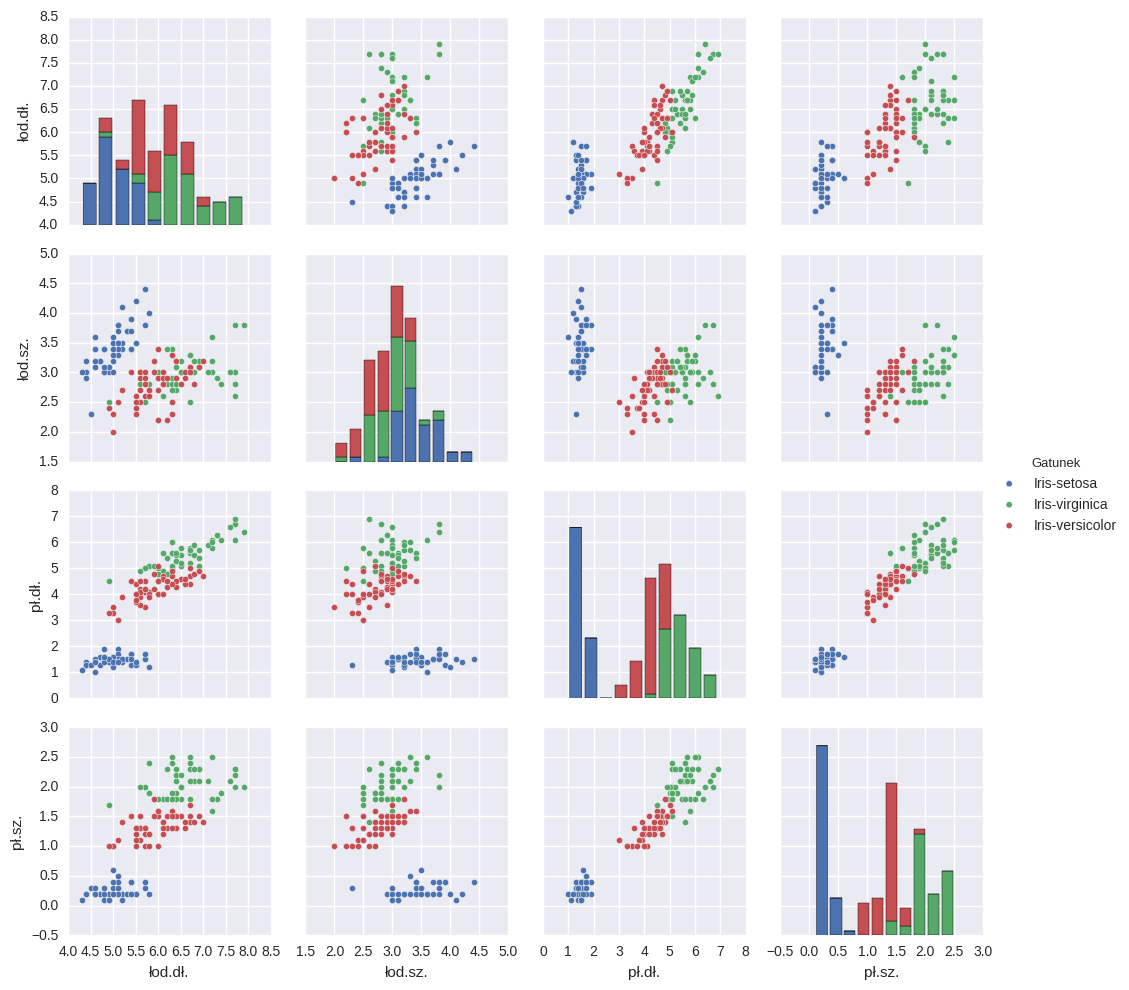

In [72]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

g = sns.pairplot(data, hue="Gatunek") 

### Przypomnienie
# Dwuklasowa regresja logistyczna

#### Funkcja logistyczna: 

$$g(x) = \dfrac{1}{1+e^{-x}}$$

In [73]:
def logistic(x):
    return 1.0/(1.0 + np.exp(-x))

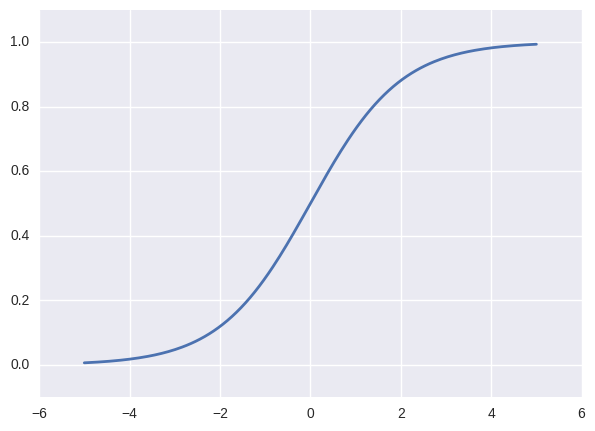

In [91]:
x = np.linspace(-5,5,200)
y = logistic(x)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.ylim(-.1,1.1)
ax.plot(x, y, linewidth='2')

Funkcja regresji logistycznej:

$$h_\theta(x) = g(\theta^Tx) = \dfrac{1}{1+e^{-\theta^Tx}}$$

Wersja macierzowa:

$$h_\theta(X) = g(X\theta) = \dfrac{1}{1+e^{-X\theta}}$$

In [75]:
def h(theta, X):
    return 1.0/(1.0 + np.exp(-X*theta))

Funkcja kosztu dla regresji logistycznej:
$$\small$$
$$\small J(\theta) = -\dfrac{1}{m} [\sum_{i=1}^{m} y^{(i)} \log h_\theta(x^{(i)})+ (1-y^{(i)}) \log (1-h_\theta(x^{(i)}))]$$

Zapis macierzowy gradientu (z wyjątkiem $h_\theta$ taki sam jak dla regresji liniowej):

$$\nabla J(\theta) = \frac{1}{|\vec y|} X^T\left(h_\theta(X)-\vec y\right)$$

In [76]:
def J(h, theta, X, y):
    m = len(y)
    h_val = h(theta,X)
    s1 = np.multiply(y, np.log(h_val))
    s2 = np.multiply((1 - y), np.log(1 - h_val))
    return -np.sum(s1 + s2, axis=0) / m

# podział danych na zbiór trenujący i testowy
XTrain, XTest = X[:100], X[100:]
YTrain, YTest = Y[:100], Y[100:]

YTrain0 = YTrain[:,0]
print("YTrain0 =", YTrain0[:6])
thetaTemp = np.ones(5).reshape(5,1)
print("J =", J(h, thetaTemp, XTrain, YTrain0))

YTrain0 = [[ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
J = [[ 11.23400611]]


In [77]:
def dJ(h,theta,X,y):
    return 1.0/len(y)*(X.T*(h(theta,X)-y))

print("dJ =", dJ(h, thetaTemp, XTrain, YTrain0))

dJ = [[ 0.67999389]
 [ 4.21797053]
 [ 1.95498027]
 [ 3.26399087]
 [ 1.11699848]]


## Przykład dwuklasowy
* Założmy, że istnieją tylko dwa gatunki irysów, _Iris-setosa_ i _Nie-Iris-setosa_.
* Zamieniamy _Iris-setosa_ na klasę 1, resztę na 0:

In [78]:
# przygotowanie Y dla regresji binarnej względem klasy 0, 1 lub 2
testClass = 0
YTrainBi = YTrain[:,testClass]

print("YTrainBi =", YTrainBi[:10])

YTrainBi = [[ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


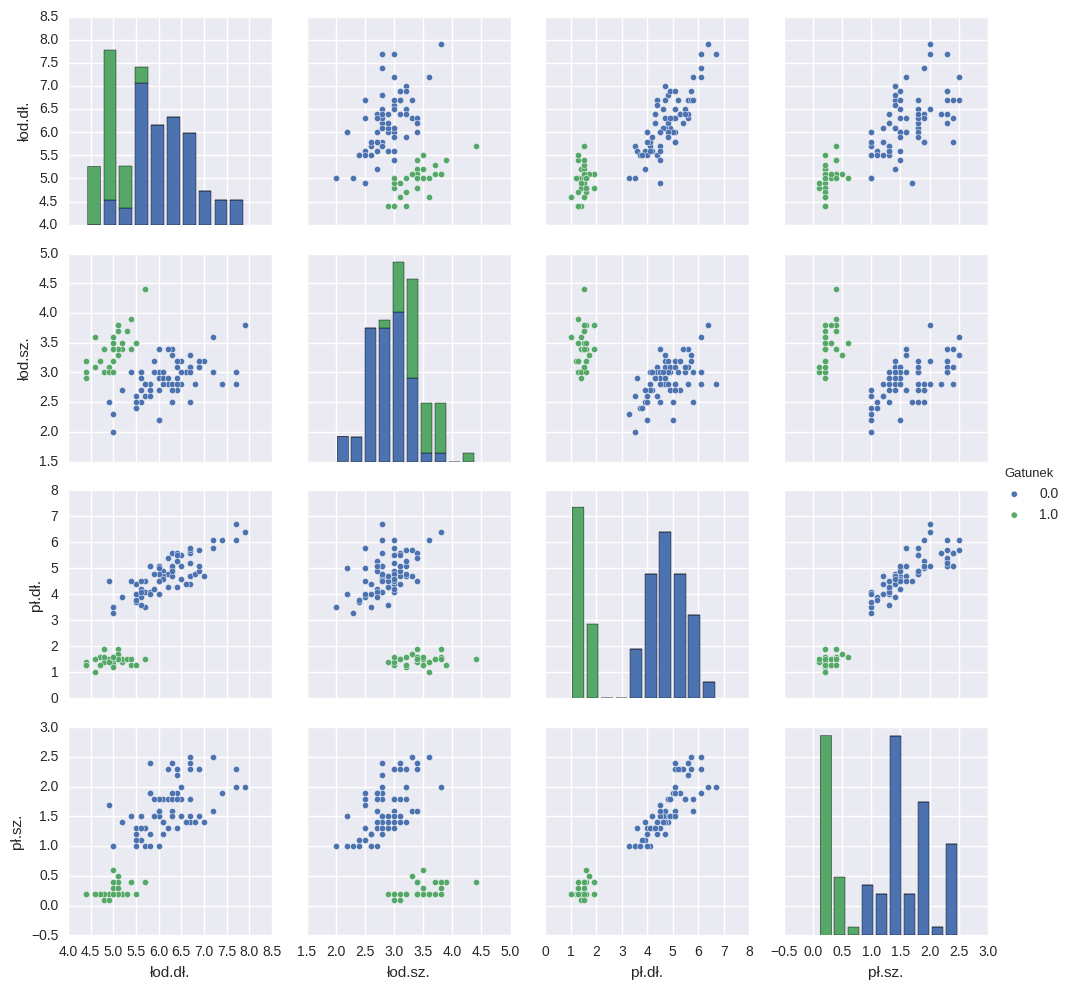

In [79]:
data0 = np.concatenate((XTrain, YTrainBi), axis=1)
df = pandas.DataFrame(data0[:,1:])
df.columns = data.columns

g = sns.pairplot(df, vars=[c for c in data.columns if c != "Gatunek"], 
                 hue="Gatunek")

### GD w dwuklasowej regresji logistycznej

In [80]:
def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, maxSteps=10000):
    errorCurr = fJ(h, theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        # oblicz nowe theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # raportuj poziom błędu
        errorCurr, errorPrev = fJ(h, theta, X, y), errorCurr
        # kryteria stopu
        if abs(errorPrev - errorCurr) <= eps:
            break
        if len(errors) > maxSteps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

# regresja binarna względem klasy ustawionej w testClass
thetaBest, errors = GD(h, J, dJ, thetaTemp, XTrain, YTrainBi, 
                       alpha=0.1, eps=10**-7, maxSteps=1000)
print("error =", errors[-1][0])
print("theta =", thetaBest)

error = [[ 0.006797]]
theta = [[ 1.11414027]
 [ 0.14887292]
 [ 2.13284493]
 [-2.89324615]
 [-0.66543637]]


## Funkcja decyzyjna regresji logistycznej

$$ c = \left\{ 
\begin{array}{cc}
1 & P(y=1|x;\theta) > 0.5 \\
0 & \textrm{wpp.}
\end{array}\right.
$$

$$ P(y=1|x;\theta) = h_\theta(x) $$

In [81]:
YTestBi = YTest[:,testClass]

def classifyBi(theta, X):
    prob = h(theta, X).item()
    return (1, prob) if prob > 0.5 else (0, prob)

print("theta =", thetaBest)
print("x0 =", X[0])
print("h(x0) =", h(thetaBest, X[0]).item())
print("c(x0) =", classifyBi(thetaBest, X[0]), "\n")

theta = [[ 1.11414027]
 [ 0.14887292]
 [ 2.13284493]
 [-2.89324615]
 [-0.66543637]]
x0 = [[ 1.   5.2  3.4  1.4  0.2]]
h(x0) = 0.993010417583857
c(x0) = (1, 0.993010417583857) 



## Skuteczność

In [82]:
acc = 0.0
for i, rest in enumerate(YTestBi):
    cls, prob = classifyBi(thetaBest, XTest[i])
    if i < 10:
        print(int(YTestBi[i].item()), "<=>", cls, "-- prob:", round(prob, 4))
    acc += cls == YTestBi[i].item()

print("\nAccuracy:", acc / len(XTest))

0 <=> 0 -- prob: 0.0
1 <=> 1 -- prob: 0.9816
0 <=> 0 -- prob: 0.0001
0 <=> 0 -- prob: 0.0005
0 <=> 0 -- prob: 0.0001
1 <=> 1 -- prob: 0.9936
0 <=> 0 -- prob: 0.0059
0 <=> 0 -- prob: 0.0992
0 <=> 0 -- prob: 0.0001
0 <=> 0 -- prob: 0.0001

Accuracy: 1.0


## Wieloklasowa regresja logistyczna

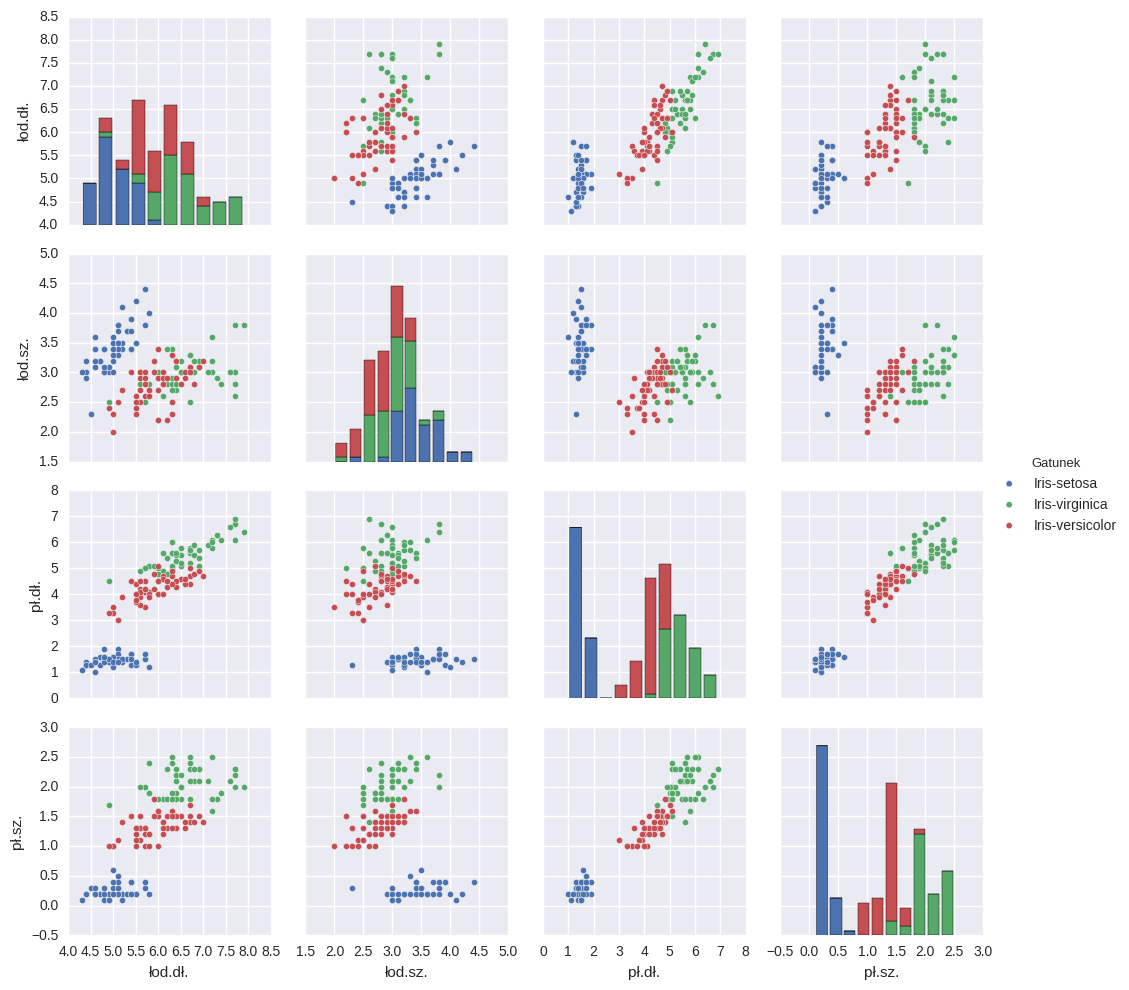

In [83]:
g = sns.pairplot(data, hue="Gatunek")

## Od regresji logistycznej dwuklasowej do wieloklasowej

* Irysy są przydzielone do trzech klas: _Iris-setosa_ (0), _Iris-versicolor_ (1), _Iris-virginica_ (2).
* Wiemy jak stworzyć klasyfikatory typu _Iris-setosa_ vs. _Nie-Iris-setosa_ (tzw. one-vs-all).
* Możemy stworzyć trzy klasyfikatory $h_{\theta_1}, h_{\theta_2}, h_{\theta_3}$ (otrzymując trzy zestawy parametrów $\theta$) i wybrać klasę o najwyższym prawdopodobieństwie.

Czy przy takim podejściu zachodzi i powinien zachodzić poniższy wzór?

$$\small \sum_{c=1,\ldots,3}h_{\theta_c}(x) = \sum_{c=1,\ldots,3}P(y=c|x;\theta_c) = 1$$

## Funkcja Softmax

* Odpowiednikiem funkcji logistycznej dla wieloklasowej regresji logistycznej jest funkcja $\mathrm{softmax}$:

$$ \textrm{softmax}(k,x_1,\dots,x_n) = \dfrac{e^{x_k}}{\sum_{i=i}^{n}e^{x_i}} $$

$$P(y=c|x;\theta_1,\ldots,\theta_k) = \textrm{softmax}(c,\theta_1^Tx,\ldots,\theta_k^Tx)$$

**Uwaga**: funkcja $\textrm{softmax}$ zastępuje funkcję logistyczną, zatem wstawiamy do niej same termy liniowe $\theta^Tx$ regresji binarnej, a nie $h_\theta(x)$.

Czy teraz zachodzi poniższy wzór?

$$\sum_{c=1\ldots{}k}P(y=c|x;\theta_c) = 1$$

In [93]:
# Zapis macierzowy, dlaczego to jest poprawne?
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X))
X5 = X[:3]
print("X5 =", X5)
print("softmax =", softmax(X5))

X5 = [[ 1.   5.2  3.4  1.4  0.2]
 [ 1.   5.1  3.7  1.5  0.4]
 [ 1.   6.7  3.1  5.6  2.4]]
softmax = [[ 0.00175241  0.11686208  0.01931717  0.0026143   0.00078741]
 [ 0.00175241  0.10574119  0.02607546  0.00288924  0.00096175]
 [ 0.00175241  0.52373952  0.01431051  0.17433774  0.00710639]]


In [94]:
XN = np.matrix([2.1, 0.5, 0.8, 0.9, 3.2]).reshape(5,1)
P = softmax(XN)
print(XN)
print("Suma X =", np.sum(XN), "\n")
print(P)
print("Suma P =", np.sum(P))

[[ 2.1]
 [ 0.5]
 [ 0.8]
 [ 0.9]
 [ 3.2]]
Suma X = 7.5 

[[ 0.20921428]
 [ 0.04223963]
 [ 0.05701754]
 [ 0.06301413]
 [ 0.62851442]]
Suma P = 1.0


In [86]:
def trainMaxEnt(X, Y):
    n = X.shape[1]
    thetas = []
    for c in range(Y.shape[1]):
        YBi = Y[:,c]
        theta = np.matrix(np.random.random(n)).reshape(n,1)
        thetaBest, errors = GD(h, J, dJ, theta, 
                               X, YBi, alpha=0.1, eps=10**-4)
        thetas.append(thetaBest)
    return thetas

thetas = trainMaxEnt(XTrain, YTrain);
for theta in thetas:
    print(theta, "\n")

[[ 1.07963204]
 [ 0.14131419]
 [ 1.32605551]
 [-2.00514666]
 [-0.62528427]] 

[[ 0.86328646]
 [ 0.04849659]
 [-1.02344967]
 [ 0.57909501]
 [-0.70989395]] 

[[-0.38372479]
 [-1.67768447]
 [-1.87775979]
 [ 2.50814988]
 [ 2.4242374 ]] 



## Funkcja decyzyjna wieloklasowej regresji logistycznej

$$ c = \mathop{\textrm{arg}\,\textrm{max}}_{i \in \{1, \ldots ,k\}} P(y=i|x;\theta_1,\ldots,\theta_k) $$

In [87]:
def classify(thetas, X, debug=False):
    regs = np.array([(X*theta).item() for theta in thetas])
    if debug:
        print("regs  =", regs)
    probs = softmax(regs)
    if debug:
        print("probs =", np.around(probs,decimals=3))
    return np.argmax(probs), probs

print("YTest =", YTest[:6])
YTestCls = YTest * np.matrix((0,1,2)).T
print("YTestCls =", YTestCls[:6], "\n")

YTest = [[ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]
YTestCls = [[ 2.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 0.]] 



## Ewaluacja

In [88]:
acc = 0.0
for i in range(len(YTestCls)):
    cls, probs = classify(thetas, XTest[i], i < 6)
    correctCls = int(YTestCls[i].item())
    if i < 6:
        print(correctCls, "  <=>", cls, " -- ", cls == correctCls, np.round(probs, 4).tolist())
    acc += correctCls == cls
print("\nAccuracy =", acc/len(XTest))

regs  = [-7.80114905  0.61979696  2.0886468 ]
probs = [ 0.     0.187  0.813]
2   <=> 2  --  True [0.0, 0.1871, 0.8128]
regs  = [ 2.74131607 -1.37651408 -9.83120854]
probs = [ 0.984  0.016  0.   ]
0   <=> 0  --  True [0.984, 0.016, 0.0]
regs  = [-7.08233295  0.06314649  1.96041898]
probs = [ 0.     0.13   0.869]
2   <=> 2  --  True [0.0001, 0.1304, 0.8695]
regs  = [-5.46020737 -0.24535724  1.23984921]
probs = [ 0.001  0.184  0.815]
2   <=> 2  --  True [0.001, 0.1845, 0.8145]
regs  = [-6.71482636  0.74722703  1.93979622]
probs = [ 0.     0.233  0.767]
2   <=> 2  --  True [0.0001, 0.2328, 0.7671]
regs  = [  3.35548212  -2.16578173 -11.53293433]
probs = [ 0.996  0.004  0.   ]
0   <=> 0  --  True [0.996, 0.004, 0.0]

Accuracy = 1.0


# Klasyfikacja za pomocą regresji liniowej

Mając $X^\prime$ oraz $\vec{y}^\prime$, liczymy $\theta$ np. za pomocą macierzy normalnej (nie ma żadnej modyfikacji algorytmu uczącego czy funkji kosztu):

$$ \theta = (X^TX^\prime)^{-1}X^T\vec{y} $$

lub możemy obliczyć wszystkie zestawy parametrów $\theta$ dla wszystkich klas za pomocą jednej operacji, gdzie Y to macierz indykatorów wszystkich klas:

$$ \Theta = (X^TX^\prime)^{-1}X^TY $$

In [89]:
def norm(X, y):
    return np.linalg.pinv(X.T*X)*X.T*y

# Macierz wszystkich parametrów
thetas = norm(XTrain, YTrain)
print("thetas =\n", thetas, "\n")

# W porównianiu pojedyncze zestawy parametrów
theta0 = norm(XTrain, YTrain[:,0])
print("theta0 =\n", theta0)
theta1 = norm(XTrain, YTrain[:,1])
print("theta1 =\n", theta1)
theta2 = norm(XTrain, YTrain[:,2])
print("theta2 =\n", theta2)

thetas =
 [[ 0.15559989  1.36282683 -0.51842672]
 [ 0.06548886 -0.12672124  0.06123239]
 [ 0.24611835 -0.28706235  0.040944  ]
 [-0.25373209  0.39377629 -0.1400442 ]
 [-0.01552919 -0.71019839  0.72572759]] 

theta0 =
 [[ 0.15559989]
 [ 0.06548886]
 [ 0.24611835]
 [-0.25373209]
 [-0.01552919]]
theta1 =
 [[ 1.36282683]
 [-0.12672124]
 [-0.28706235]
 [ 0.39377629]
 [-0.71019839]]
theta2 =
 [[-0.51842672]
 [ 0.06123239]
 [ 0.040944  ]
 [-0.1400442 ]
 [ 0.72572759]]


 ## Klasyfikacja

Mając macierz $\Theta$ potrafimy teraz obliczyć maciesz kosztów $K$ dla wszystkich wierszy testowych i dla wszystkich klas za pomocą jednej operacji, czyli

$$ K = X\Theta $$

Aby zaklasyfikować wszystkie wiersze ze zbioru testowego $X$, wystarczy teraz wykonać $\mathop{\textrm{arg}\,\textrm{max}}$ po wierszach macierzy $K=X\Theta$.

$$ c_i = \mathop{\textrm{arg}\,\textrm{max}}_{j \in \{1, \ldots ,k\}} \{ (X\Theta)_{ij} \} , \textrm{dla } i = 1,\ldots,m $$

In [90]:
def h(theta,X):
    return X*theta

def classify(thetas, X):
    costs = h(thetas, X)
    best = np.argmax(costs, axis=1)
    return best, costs

Res, Costs = classify(thetas, XTest)
acc = sum(Res == YTestCls).item()/YTestCls.shape[0]
print("Accuracy:", acc)

Accuracy: 0.88


## Dyskusja

1. Jakie są wady i zalety metody one-vs-all w porównaniu z wieloklasową regresją logistyczną?
1. Jakie są wady i zalety metody z wykorzystaniem macierzy normalnej w porównaniu z regresją logistyczną?